# Código - Função custo



## Objetivo

- Implementar e explorar a função `custo` utilizada na regressão linear com uma variável.


## Ferramentas

Nesse código, você usará: 
- NumPy, uma biblioteca popular para cálculos matriciais, etc
- Matplotlib, uma biblioteca popular para gerar figuras a partir de dados

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Definição do Problema

Você gostaria de estimar a tensão sobre um resistor com base no seu valor de corrente.

Usaremos as mesmas amostras de dados que já utilizamos no código anterior: 

| Corrente (A)     | Tensão (V) |
| -------------------| ------------------------ |
| 0.2               | 21                      |
| 4.5               | 430                      |


In [2]:
x_train = np.array([0.2, 4.5]) # Corrente
y_train = np.array([21.0, 430.0]) # Tensão

print(x_train)
print(y_train)

[0.2 4.5]
[ 21. 430.]


## Calculando o Custo

O custo mede o quão bem o nosso modelo está estimando a tensão sobre o resistor.

A equação para o custo com uma variável é:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
onde 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ é a nossa previsão para a amostra $i$ usando os parâmetros $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ é o erro quadrático entre o valor alvo (medido) e a previsão (estimativa) feita pelo modelo.   
- Esses erros são somados para todas as $m$ amostras e divididas por `2m` para produzir o custo $J(w,b)$.  
>OBS: Nos slides da disciplina, o somatório vai tipicamente de 1 até m. Por outro lado, no código ele vai de 0 até m-1, já que em Python tem-se como zero a referência de indexação para vetores e matrizes


O código abaixo calcula o custo fazendo um loop que inclui cada amostra. Para cada iteração do loop:
- a saída do modelo `f_wb` é calculada (previsão)
- a diferença (erro) entre a saída alvo e a previsão é calculada e elevada ao quadrado.
- essa quantidade é adicionada ao custo total.

In [7]:
def calcula_custo(x: np.ndarray, y: np.ndarray, w: float, b: float) -> float: 
    """
    Calcula a função custo no âmbito da regressão linear.
    Argumentos da função:
      x (ndarray (m,)): Conjunto de dados com m amostras 
      y (ndarray (m,)): Valores alvo de saída
      w,b (escalar)   : Parâmetros do modelo  
    Retorna
      custo_total (float): O custo custo de se usar w,b como parâmetros na regressão linear
               para ajustar os dados
    """
    # número de amostras de treinamento
    m = x.shape[0] 
    
    soma_custo = 0 
    for i in range(m): 
        f_wb = w * x[i] + b  # Monta equação estimativa
        custo = (f_wb - y[i]) ** 2  # Calcula o erro quadrático
        soma_custo = soma_custo + custo  # Somatório o erro quadrático
    custo_total = (1 / (2 * m)) * soma_custo # Calcula erro quadrático médio

    return custo_total

In [60]:
def calcula_saida_do_modelo(x, w, b):
    """
    Calcula a previsão para um modelo na forma de reta
    Argumentos da função:
      x (ndarray (m,)): Conjunto de dados com m amostras 
      w,b (escalar)   : Parâmetros do modelo  
    Retorna
      y (ndarray (m,)): Previsão de saída
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m): # estrutura 'for' em Python
        f_wb[i] = w * x[i] + b
        
    return f_wb

## Função custo: uma visão intuitiva

O seu objetivo agora é encontrar um modelo $f_{w,b}(x) = wx + b$, com parâmetros $w,b$, que seja capaz de estimar com precisão a tensão sobre um resistor para uma dada corrente de entrada $x$. O custo é a medida do quão bem o modelo performa com base nos dados de treinamento.

A função custo (1) acima mostra que, se $w$ e $b$ podem ser selecionados tal que as previsões $f_{w,b}(x)$ são iguais aos dados em $y$, então o termo $(f_{w,b}(x^{(i)}) - y^{(i)})^2 $ será zero e o custo é minimizado. Neste exemplo simples que possui apenas dois pontos, você pode conseguir exatamente isso.

No código anterior, você já encontrou valores para $w,b$ que resultam num modelo preciso. Insira esses valores no código abaixo e verifique o custo associado. Se necessário, refine os valores escolhidos para $w,b$ até que um custo $J(w,b)$ próximo de zero seja obtido.

Sample count:  2


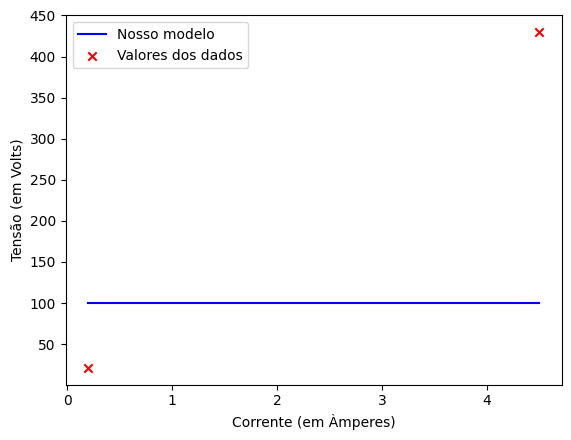

Custo J para esse conjunto de parâmetros w,b: 28785.25


In [5]:
w = 0
b = 100

# Calculando a tensão estimada para o modelo para as correntes em x_train
m    = x_train.shape[0]
f_wb = np.zeros(m)
for i in range(m):
    f_wb[i] = w * x_train[i] + b

J = calcula_custo(x_train, y_train, w, b)

# Plotando a previsão feita pelo modelo
plt.plot(x_train, f_wb, c='b',label='Nosso modelo')

# Plotando os dados medidos
plt.scatter(x_train, y_train, marker='x', c='r',label='Valores dos dados')

# Ajustando o rótulo do eixo y 
plt.ylabel('Tensão (em Volts)')
# Ajustando o rótulo do eixo x 
plt.xlabel('Corrente (em Àmperes)')
plt.legend()
plt.show()

print(f"Custo J para esse conjunto de parâmetros w,b: {J}")

Note no código abaixo que, fixando o valor de $b$ em $b=0$, podemos verificar como é o gráfico da função custo $J$ em função do parâmetro $w$.

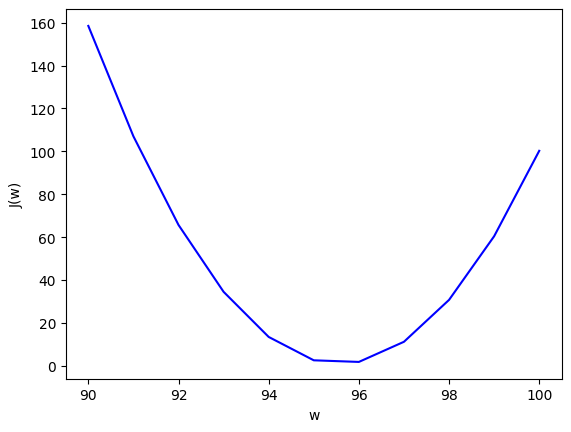

In [8]:
b = 0

valores_para_w = np.array([90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100])

qtdade_de_valores = valores_para_w.shape[0]

J = np.zeros(qtdade_de_valores)

for i in range(qtdade_de_valores):
    w    = valores_para_w[i]
    J[i] = calcula_custo(x_train, y_train, w, b)
    
# Plotando o custo em J para diferentes valores de w
plt.plot(valores_para_w, J, c='b')

# Ajustando o rótulo do eixo y 
plt.ylabel('J(w)')
# Ajustando o rótulo do eixo x 
plt.xlabel('w')
plt.show()

Alguns pontos podem ser destacados
- O custo é minimizado para $b$ próximo de 0 e para $w$ próximo de 96. Tais resultados estão de acordo com os resultados vistos no último código.
- Uma vez que o erro entre o valor medido e a previsão é elevado ao quadrado na função custo, o custo rapidamente cresce quando $w$ se distancia do seu valor ideal.
- Se `w` e `b` forem selecionados de forma que $J=0$, isso significa que o modelo se ajusta perfeitamente aos dados.

# Parabéns!
Você aprendeu o seguinte nesse código:
 - A função custo nos fornece uma medida de quão boas são as estimativas feitas pelo nosso modelo
 - Minimizar a função custo pode nos levar a valores ótimos para $w$, $b$.

# Exercício
Insira no código da Parte 1 o conjunto de medições que você já criou anteriormente para um resistor de 50 Ω, faça as adaptações necessárias e verifique os resultados.

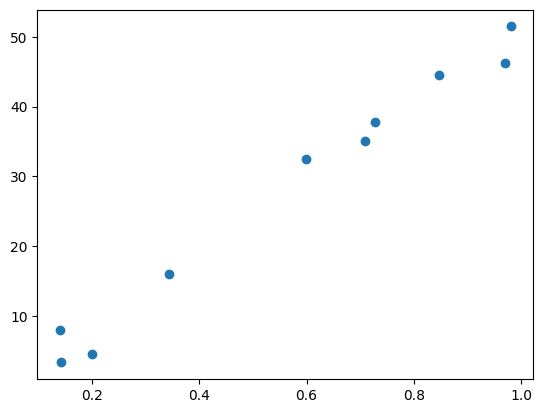

In [83]:
r = 50
i = np.array(np.random.random(10))
v = np.ndarray(i.shape)

v = r * i + np.random.randn(i.shape[0])*2.5

# x_train = np.array([0.2, 4.5]) # Corrente
x_train = i
# y_train = np.array([21.0, 430.0]) # Tensão
y_train = v

plt.scatter(i, v)
plt.show()

Best W:  50
Minor J:  3.5032135629394605


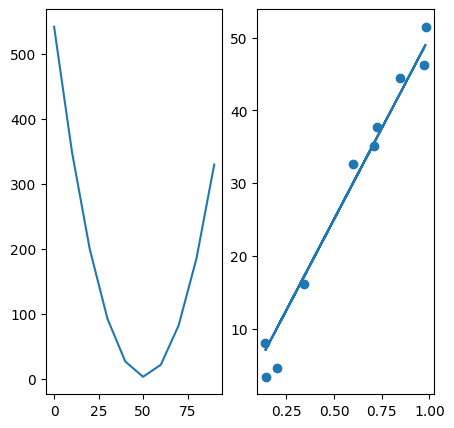

In [84]:
# Define b e w base
b = 0
w = np.arange(0, 100, 10)

# Get the x_train shape
m = x_train.shape[0]

# Get the w shape of desired values
w_size = w.shape[0]

# Initialize cost function
J = np.zeros(w_size)

min_J = 0
best_w = 0

# Get all cost funciton values
for index in range(w_size):
    J[index] = calcula_custo(x_train, y_train, w[index], b)
    if index == 0:
        min_J = J[index]
        best_w = w[index]
    elif min_J > J[index]:
        min_J = J[index]
        best_w = w[index]


print("Best W: ", best_w)
print("Minor J: ", min_J)

# Estimate values
Fwd = calcula_saida_do_modelo(x_train, best_w, b)

# Plot results
fig = plt.figure(figsize=(5,5))
sp1 = plt.subplot(1, 2, 1)
sp2 = plt.subplot(1, 2, 2)

# Função de custo
# plt.title("Função Custo")
sp1.plot(w, J)

# Reta estimada
# plt.title("Reta estimada")
sp2.scatter(x_train, y_train)
sp2.plot(x_train, Fwd)

# fig.show()